<a href="https://colab.research.google.com/github/profitter261/Healthcare-AI-ML-App/blob/main/Lenght_of_stay_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
admissions = pd.read_csv('/content/admissions.csv')
patients = pd.read_csv('/content/patients.csv')
d_icd = pd.read_csv('/content/diagnoses_icd.csv')
d_codes = pd.read_csv('/content/drgcodes.csv')

In [ ]:
merged = pd.merge(admissions, patients, on='subject_id')
merged.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,marital_status,race,edregtime,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0,M,47,2196,2014 - 2016,NaN
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,...,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0,M,58,2153,2011 - 2013,NaN
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,...,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0,M,79,2133,2011 - 2013,2134-10-28
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,...,NaN,UNKNOWN,NaN,NaN,1,M,52,2111,2014 - 2016,2111-11-15
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,...,WIDOWED,WHITE,NaN,NaN,0,F,82,2113,2014 - 2016,NaN


In [ ]:
merged = pd.merge(merged, d_icd, on='subject_id')
merged.head()

,subject_id,hadm_id_x,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod,hadm_id_y,seq_num,icd_code,icd_version
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,0,M,47,2196,2014 - 2016,NaN,25970245,5,57512,9
1,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,0,M,47,2196,2014 - 2016,NaN,25970245,10,V8535,9
2,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,0,M,47,2196,2014 - 2016,NaN,25970245,7,42789,9
3,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,0,M,47,2196,2014 - 2016,NaN,25970245,3,27800,9
4,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,0,M,47,2196,2014 - 2016,NaN,25970245,6,2749,9


In [ ]:
merged = pd.merge(merged, d_codes, on='subject_id')
merged.head()

,subject_id,hadm_id_x,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,hadm_id_y,seq_num,icd_code,icd_version,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,25970245,5,57512,9,22187210,HCFA,864,FEVER,NaN,NaN
1,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,25970245,5,57512,9,22187210,APR,722,FEVER,2.0,1.0
2,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,25970245,5,57512,9,25970245,APR,260,"MAJOR PANCREAS, LIVER & SHUNT PROCEDURES",3.0,2.0
3,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,25970245,5,57512,9,25970245,HCFA,406,"PANCREAS, LIVER & SHUNT PROCEDURES W CC",NaN,NaN
4,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,...,25970245,5,57512,9,24181354,APR,720,SEPTICEMIA & DISSEMINATED INFECTIONS,4.0,4.0


In [ ]:
merged.columns

Index(['subject_id', 'hadm_id_x', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admit_provider_id', 'admission_location',
       'discharge_location', 'insurance', 'language', 'marital_status', 'race',
       'edregtime', 'edouttime', 'hospital_expire_flag', 'gender',
       'anchor_age', 'anchor_year', 'anchor_year_group', 'dod', 'hadm_id_y',
       'seq_num', 'icd_code', 'icd_version', 'hadm_id', 'drg_type', 'drg_code',
       'description', 'drg_severity', 'drg_mortality'],
      dtype='object')

In [ ]:
df = merged.copy()

In [ ]:
cols = ['subject_id', 'hadm_id_x', 'deathtime', 'admit_provider_id', 'edregtime', 'edouttime', 'anchor_year', 'anchor_year_group', 'dod', 'hadm_id_y',
       'seq_num', 'hadm_id', 'description']
df = df.drop(columns=cols)

In [ ]:
df.head()

,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,gender,anchor_age,icd_code,icd_version,drg_type,drg_code,drg_severity,drg_mortality
0,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,HCFA,864,NaN,NaN
1,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,APR,722,2.0,1.0
2,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,APR,260,3.0,2.0
3,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,HCFA,406,NaN,NaN
4,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,APR,720,4.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519130 entries, 0 to 519129
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   admittime             519130 non-null  object 
 1   dischtime             519130 non-null  object 
 2   admission_type        519130 non-null  object 
 3   admission_location    519130 non-null  object 
 4   discharge_location    401532 non-null  object 
 5   insurance             519130 non-null  object 
 6   language              519130 non-null  object 
 7   marital_status        518582 non-null  object 
 8   race                  519130 non-null  object 
 9   hospital_expire_flag  519130 non-null  int64  
 10  gender                519130 non-null  object 
 11  anchor_age            519130 non-null  int64  
 12  icd_code              519130 non-null  object 
 13  icd_version           519130 non-null  int64  
 14  drg_type              519130 non-null  object 
 15  

In [ ]:
df.isnull().sum()

,0
admittime,0
dischtime,0
admission_type,0
admission_location,0
discharge_location,117598
insurance,0
language,0
marital_status,548
race,0
hospital_expire_flag,0


In [ ]:
cols = ['discharge_location', 'marital_status']
for col in cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2714963522.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
cols = ['drg_severity', 'drg_mortality']
for col in cols:
  df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-1664528089.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
df.duplicated().sum()

np.int64(278442)

In [ ]:
if df.duplicated().sum() > 0:
  df.drop_duplicates(inplace=True)

In [ ]:
df

,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,gender,anchor_age,icd_code,icd_version,drg_type,drg_code,drg_severity,drg_mortality
0,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,HCFA,864,2.864075,2.508556
1,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,APR,722,2.000000,1.000000
2,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,APR,260,3.000000,2.000000
3,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,HCFA,406,2.864075,2.508556
4,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,APR,720,4.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519119,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,DIVORCED,WHITE,0,M,65,4142,9,HCFA,307,2.864075,2.508556
519120,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,DIVORCED,WHITE,0,M,65,4142,9,HCFA,221,2.864075,2.508556
519121,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,DIVORCED,WHITE,0,M,65,4142,9,APR,200,2.000000,1.000000
519122,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,DIVORCED,WHITE,0,M,65,4142,9,APR,24,2.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240688 entries, 0 to 519123
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   admittime             240688 non-null  object 
 1   dischtime             240688 non-null  object 
 2   admission_type        240688 non-null  object 
 3   admission_location    240688 non-null  object 
 4   discharge_location    240688 non-null  object 
 5   insurance             240688 non-null  object 
 6   language              240688 non-null  object 
 7   marital_status        240688 non-null  object 
 8   race                  240688 non-null  object 
 9   hospital_expire_flag  240688 non-null  int64  
 10  gender                240688 non-null  object 
 11  anchor_age            240688 non-null  int64  
 12  icd_code              240688 non-null  object 
 13  icd_version           240688 non-null  int64  
 14  drg_type              240688 non-null  object 
 15  drg_c

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_indices = pd.Index([])

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices = outlier_indices.union(col_outliers)

print(f"Number of outliers detected: {len(outlier_indices)}")

Number of outliers detected: 68024


In [ ]:
display(df.loc[outlier_indices].head())

,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,gender,anchor_age,icd_code,icd_version,drg_type,drg_code,drg_severity,drg_mortality
1,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,APR,722,2.0,1.0
4,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,57512,9,APR,720,4.0,4.0
7,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,V8535,9,APR,722,2.0,1.0
10,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,V8535,9,APR,720,4.0,4.0
13,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,0,M,47,42789,9,APR,722,2.0,1.0


In [ ]:
df['race'].unique()

array(['BLACK/CAPE VERDEAN', 'HISPANIC/LATINO - PUERTO RICAN', 'WHITE',
       'UNKNOWN', 'OTHER', 'BLACK/AFRICAN AMERICAN',
       'HISPANIC/LATINO - SALVADORAN', 'UNABLE TO OBTAIN',
       'WHITE - OTHER EUROPEAN', 'PORTUGUESE', 'HISPANIC/LATINO - CUBAN',
       'PATIENT DECLINED TO ANSWER', 'WHITE - BRAZILIAN',
       'HISPANIC OR LATINO'], dtype=object)

In [ ]:
cols = ['admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 'icd_code', 'drg_type']
for col in cols:
  print(f'{col}')
  print(df[col].unique())

admission_type
['URGENT' 'ELECTIVE' 'EW EMER.' 'DIRECT EMER.' 'EU OBSERVATION'
 'OBSERVATION ADMIT' 'DIRECT OBSERVATION' 'AMBULATORY OBSERVATION'
 'SURGICAL SAME DAY ADMISSION']
admission_location
['TRANSFER FROM HOSPITAL' 'TRANSFER FROM SKILLED NURSING FACILITY'
 'INTERNAL TRANSFER TO OR FROM PSYCH' 'PHYSICIAN REFERRAL'
 'EMERGENCY ROOM' 'PACU' 'PROCEDURE SITE' 'WALK-IN/SELF REFERRAL'
 'INFORMATION NOT AVAILABLE' 'CLINIC REFERRAL']
discharge_location
['SKILLED NURSING FACILITY' 'HOME HEALTH CARE' 'DIED' 'HOME'
 'ACUTE HOSPITAL' 'CHRONIC/LONG TERM ACUTE CARE' 'REHAB' 'HOSPICE'
 'AGAINST ADVICE' 'PSYCH FACILITY']
insurance
['Medicaid' 'Medicare' 'Other']
language
['ENGLISH' '?']
marital_status
['SINGLE' 'MARRIED' 'WIDOWED' 'DIVORCED']
icd_code
['57512' 'V8535' '42789' ... '73730' '75612' '72403']
drg_type
['HCFA' 'APR']


In [ ]:
df.columns

Index(['admittime', 'dischtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'marital_status', 'race',
       'hospital_expire_flag', 'gender', 'anchor_age', 'icd_code',
       'icd_version', 'drg_type', 'drg_code', 'drg_severity', 'drg_mortality'],
      dtype='object')

In [ ]:
df['language'] = df['language'].replace('?', 'OTHERS')

In [ ]:
cols_to_encode = ['insurance', 'language', 'marital_status', 'drg_type']
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

In [ ]:
cols = ['admittime', 'dischtime']
for col in cols:
  df[col] = pd.to_datetime(df[col])

In [ ]:
df['los'] = df['dischtime'] - df['admittime']

In [ ]:
df['los'] = df['los'].dt.days

In [ ]:
cols = ['admittime', 'dischtime']
for col in cols:
  df = df.drop(col, axis=1)

In [ ]:
categorical_cols = ['admission_type', 'admission_location', 'discharge_location', 'race', 'icd_code']

for col in categorical_cols:
        mean_encoded_col = df.groupby(col)['los'].mean()
        df[col] = df[col].map(mean_encoded_col)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240688 entries, 0 to 519123
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   admission_type          240688 non-null  float64
 1   admission_location      240688 non-null  float64
 2   discharge_location      240688 non-null  float64
 3   race                    240688 non-null  float64
 4   hospital_expire_flag    240688 non-null  int64  
 5   gender                  240688 non-null  object 
 6   anchor_age              240688 non-null  int64  
 7   icd_code                240688 non-null  float64
 8   icd_version             240688 non-null  int64  
 9   drg_code                240688 non-null  int64  
 10  drg_severity            240688 non-null  float64
 11  drg_mortality           240688 non-null  float64
 12  insurance_Medicare      240688 non-null  bool   
 13  insurance_Other         240688 non-null  bool   
 14  language_OTHERS         2

In [ ]:
df.columns

Index(['admission_type', 'admission_location', 'discharge_location', 'race',
       'hospital_expire_flag', 'gender', 'anchor_age', 'icd_code',
       'icd_version', 'drg_code', 'drg_severity', 'drg_mortality',
       'insurance_Medicare', 'insurance_Other', 'language_OTHERS',
       'marital_status_MARRIED', 'marital_status_SINGLE',
       'marital_status_WIDOWED', 'drg_type_HCFA', 'los'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [ ]:
cols = ['insurance_Medicare', 'insurance_Other', 'language_OTHERS', 'marital_status_MARRIED', 'marital_status_SINGLE', 'marital_status_WIDOWED', 'drg_type_HCFA', 'gender_M']
for col in cols:
  df[col] = df[col].astype(int)

In [ ]:
df

,admission_type,admission_location,discharge_location,race,hospital_expire_flag,anchor_age,icd_code,icd_version,drg_code,drg_severity,drg_mortality,insurance_Medicare,insurance_Other,language_OTHERS,marital_status_MARRIED,marital_status_SINGLE,marital_status_WIDOWED,drg_type_HCFA,los,gender_M
0,10.505141,8.372143,9.238376,4.666667,0,47,4.666667,9,864,2.864075,2.508556,0,0,0,0,1,0,1,8,1
1,10.505141,8.372143,9.238376,4.666667,0,47,4.666667,9,722,2.000000,1.000000,0,0,0,0,1,0,0,8,1
2,10.505141,8.372143,9.238376,4.666667,0,47,4.666667,9,260,3.000000,2.000000,0,0,0,0,1,0,0,8,1
3,10.505141,8.372143,9.238376,4.666667,0,47,4.666667,9,406,2.864075,2.508556,0,0,0,0,1,0,1,8,1
4,10.505141,8.372143,9.238376,4.666667,0,47,4.666667,9,720,4.000000,4.000000,0,0,0,0,1,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519119,4.321252,5.121274,9.238376,5.406963,0,65,1.631579,9,307,2.864075,2.508556,1,0,0,0,0,0,1,2,1
519120,4.321252,5.121274,9.238376,5.406963,0,65,1.631579,9,221,2.864075,2.508556,1,0,0,0,0,0,1,2,1
519121,4.321252,5.121274,9.238376,5.406963,0,65,1.631579,9,200,2.000000,1.000000,1,0,0,0,0,0,0,2,1
519122,4.321252,5.121274,9.238376,5.406963,0,65,1.631579,9,24,2.000000,1.000000,1,0,0,0,0,0,0,2,1


In [ ]:
df.duplicated().sum()

np.int64(105473)

In [ ]:
if df.duplicated().sum():
  df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
admission_type,0
admission_location,0
discharge_location,0
race,0
hospital_expire_flag,0
anchor_age,0
icd_code,0
icd_version,0
drg_code,0
drg_severity,0


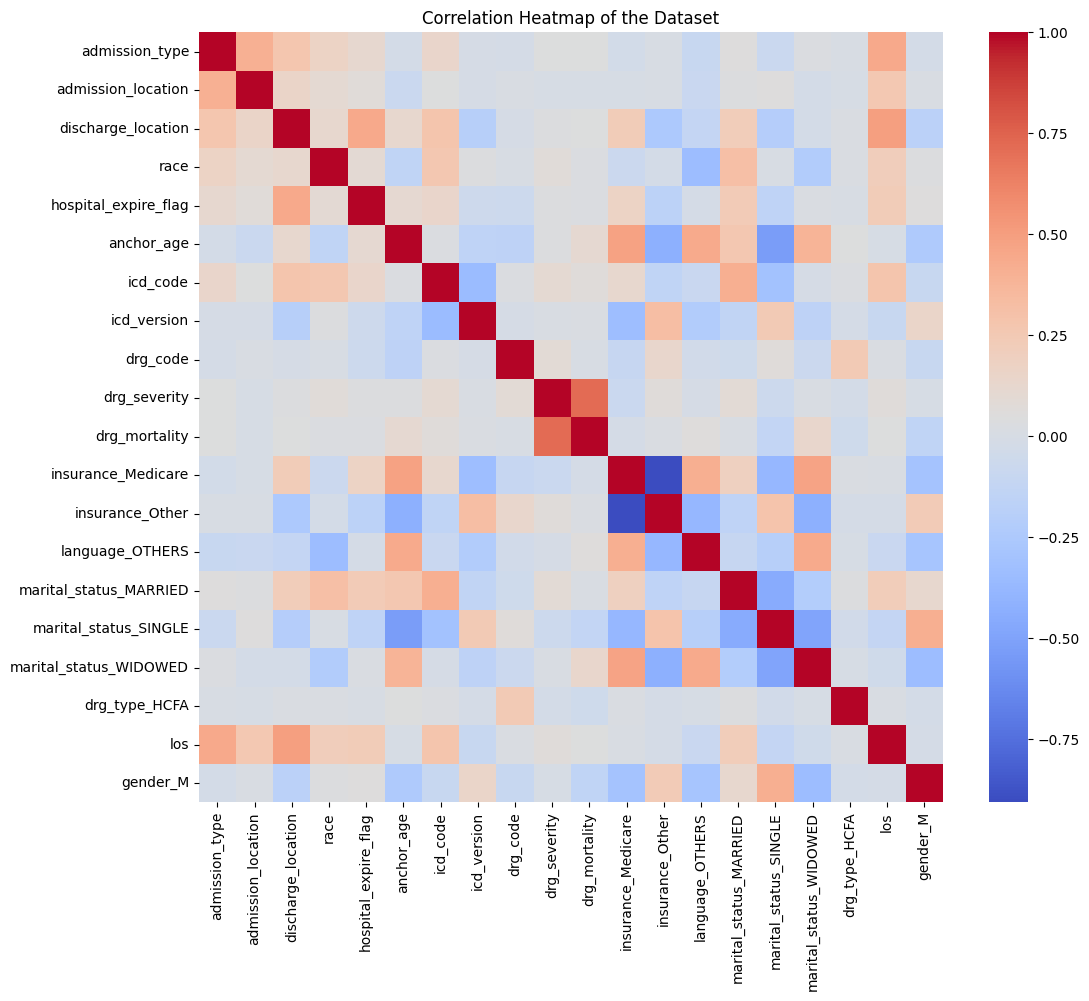

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of the Dataset')
plt.show()

In [ ]:
# Calculate the absolute correlation of each feature with 'los'
los_correlation = correlation_matrix['los'].abs().sort_values(ascending=False)

# Display the features with the highest correlation to 'los'
print("Features with the highest absolute correlation with 'los':")
display(los_correlation)

Features with the highest absolute correlation with 'los':


,los
los,1.000000
discharge_location,0.499673
admission_type,0.442806
icd_code,0.283414
admission_location,0.259984
hospital_expire_flag,0.232948
marital_status_MARRIED,0.224984
race,0.211710
marital_status_SINGLE,0.123302
icd_version,0.098640


In [ ]:
df.head()

,admission_type,admission_location,discharge_location,race,hospital_expire_flag,anchor_age,icd_code,icd_version,drg_code,drg_severity,drg_mortality,insurance_Medicare,insurance_Other,language_OTHERS,marital_status_MARRIED,marital_status_SINGLE,marital_status_WIDOWED,drg_type_HCFA,los,gender_M
0,10.505141,8.372143,9.238376,4.666667,0,47,4.666667,9,864,2.864075,2.508556,0,0,0,0,1,0,1,8,1
1,10.505141,8.372143,9.238376,4.666667,0,47,4.666667,9,722,2.000000,1.000000,0,0,0,0,1,0,0,8,1
2,10.505141,8.372143,9.238376,4.666667,0,47,4.666667,9,260,3.000000,2.000000,0,0,0,0,1,0,0,8,1
3,10.505141,8.372143,9.238376,4.666667,0,47,4.666667,9,406,2.864075,2.508556,0,0,0,0,1,0,1,8,1
4,10.505141,8.372143,9.238376,4.666667,0,47,4.666667,9,720,4.000000,4.000000,0,0,0,0,1,0,0,8,1


In [ ]:
df.isna().sum()

,0
admission_type,0
admission_location,0
discharge_location,0
race,0
hospital_expire_flag,0
anchor_age,0
icd_code,0
icd_version,0
drg_code,0
drg_severity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.to_csv('los_cleaned.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/los_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/los_data.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135215 entries, 0 to 519123
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   admission_type          135215 non-null  float64
 1   admission_location      135215 non-null  float64
 2   discharge_location      135215 non-null  float64
 3   race                    135215 non-null  float64
 4   hospital_expire_flag    135215 non-null  int64  
 5   anchor_age              135215 non-null  int64  
 6   icd_code                135215 non-null  float64
 7   icd_version             135215 non-null  int64  
 8   drg_code                135215 non-null  int64  
 9   drg_severity            135215 non-null  float64
 10  drg_mortality           135215 non-null  float64
 11  insurance_Medicare      135215 non-null  bool   
 12  insurance_Other         135215 non-null  bool   
 13  language_OTHERS         135215 non-null  bool   
 14  marital_status_MARRIED  1

In [ ]:
df.columns

Index(['admission_type', 'admission_location', 'discharge_location', 'race',
       'hospital_expire_flag', 'anchor_age', 'icd_code', 'icd_version',
       'drg_code', 'drg_severity', 'drg_mortality', 'insurance_Medicare',
       'insurance_Other', 'language_OTHERS', 'marital_status_MARRIED',
       'marital_status_SINGLE', 'marital_status_WIDOWED', 'drg_type_HCFA',
       'los', 'gender_M'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['los', 'discharge_location', 'hospital_expire_flag', 'icd_code', 'icd_version', 'drg_code', 'drg_severity', 'drg_mortality', 'race'], axis=1)
y = df['los']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.columns

Index(['admission_type', 'admission_location', 'anchor_age',
       'insurance_Medicare', 'insurance_Other', 'language_OTHERS',
       'marital_status_MARRIED', 'marital_status_SINGLE',
       'marital_status_WIDOWED', 'drg_type_HCFA', 'gender_M'],
      dtype='object')

In [ ]:
for col in X.columns:
  print(X[col].unique())

[10.50514107 11.10701614  6.09199923  6.66631163  0.27959982  7.29466506
  0.53996339  0.08693663  4.32125206]
[ 8.3721428  10.06164297  8.5         5.12127397  5.63717044  0.39633448
  1.01370599  2.17361762  5.          8.9251711 ]
[47 58 79 52 82 66 44 81 63 77 34 53 56 78 60 46 86 48 87 88 55 72 70 51
 62 76 43 65 28 64 21 91 29 71 38 89 57 67 37 59 26 84 69 45 83 50 61 80
 74 40]
[False  True]
[False  True]
[False  True]
[False  True]
[ True False]
[False  True]
[ True False]
[ True False]


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Initialize the models
lr_model = LinearRegression()
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

models = {
    "Linear Regression": lr_model,
    "Lasso": lasso_model,
    "Ridge": ridge_model,
    "Gradient Boosting": gbr_model,
    "Random Forest": rf_model
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'R-squared': r2, 'MAE': mae}

results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
display(results_df)

Model Evaluation Results:


,R-squared,MAE
Linear Regression,0.241553,4.047494
Lasso,0.192562,4.123523
Ridge,0.241553,4.047485
Gradient Boosting,0.548324,3.053305
Random Forest,0.733533,1.802987


In [ ]:
import numpy as np

y_true = y_test  # actual LoS
baseline_pred = np.full_like(y_true, fill_value=np.mean(y_true))
baseline_mae = np.mean(np.abs(y_true - baseline_pred))
print("Baseline MAE:", baseline_mae)

Baseline MAE: 4.782938283474467


In [ ]:
import pickle

# Select the best model (Random Forest)
best_model = rf_model

# Define the filename for the pickled model
filename = 'best_los_model.pkl'

# Save the model to a file
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved to {filename}")

Best model saved to best_los_model.pkl
